In [14]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('C:/Users/66959/Desktop/hello_ds/project/the_oscar_award.csv')

In [18]:
data.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10759 entries, 0 to 10758
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10759 non-null  int64 
 1   year_ceremony  10759 non-null  int64 
 2   ceremony       10759 non-null  int64 
 3   category       10759 non-null  object
 4   name           10756 non-null  object
 5   film           10449 non-null  object
 6   winner         10639 non-null  object
dtypes: int64(3), object(4)
memory usage: 588.5+ KB
None


In [19]:
data.isnull()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
10754,False,False,False,False,False,False,True
10755,False,False,False,False,False,False,True
10756,False,False,False,False,False,False,True
10757,False,False,False,False,False,False,True


From the above we know that the result of Oscar 95th is not come yet. So, for now, I will delete data from row 10641 to 70760 which is the data of Oscar 95th.

In [33]:
data = pd.DataFrame(data)
oscar =data.drop(data.index[10641:70760])

In [34]:
oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10641 entries, 0 to 10640
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10641 non-null  int64 
 1   year_ceremony  10641 non-null  int64 
 2   ceremony       10641 non-null  int64 
 3   category       10641 non-null  object
 4   name           10638 non-null  object
 5   film           10331 non-null  object
 6   winner         10639 non-null  object
dtypes: int64(3), object(4)
memory usage: 582.1+ KB


In [51]:
oscar['category']=oscar['category'].apply(lambda x:x.strip())
#oscar['name']=oscar['name'].apply(lambda x:x.strip().replace("(","").replace(")",""))
oscar['film']=oscar['film'].apply(lambda x: np.NaN if str(x)=='nan' else str(x).strip())

oscar['category']=oscar['category'].apply(lambda x:x.capitalize())

nameRole=oscar['name'].str.split(',',expand=True)
nameRole=nameRole.rename(columns={0:'one_of_the_names'})
#nameRole['one_of_the_names']=nameRole['one_of_the_names'].apply(lambda x: x if x.find(":")< 0 else x[x.index(':')+1:] )

oscar=pd.concat([oscar,nameRole['one_of_the_names']],axis=1)

In [37]:
#Film information
All_movie=oscar[['film','winner']].groupby(by='film').sum().sort_values(by='winner',ascending=False)
All_movie['Awards']=All_movie['winner'].apply(lambda x:int(x))
del All_movie['winner']
All_movie['Nominations']=oscar[['film','winner']].groupby(by='film').count()
All_movie['Winnin_rate']=All_movie['Awards']/All_movie['Nominations']

print(All_movie.head(10))

                                               Awards  Nominations  \
film                                                                 
Titanic                                            12           16   
Ben-Hur                                            11           12   
The Lord of the Rings: The Return of the King      11           11   
West Side Story                                    11           18   
The Last Emperor                                    9            9   
Gigi                                                9            9   
The English Patient                                 9           12   
Gone with the Wind                                  8           13   
From Here to Eternity                               8           13   
On the Waterfront                                   8           12   

                                               Winnin_rate  
film                                                        
Titanic                              

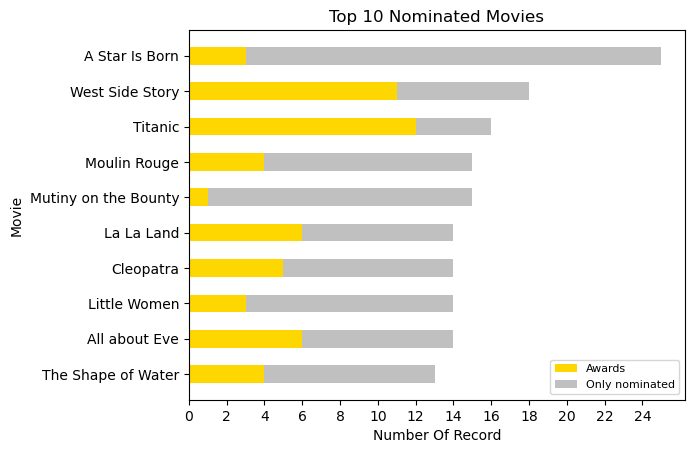

In [46]:
#Top 10 Nominated Movies
nominated_movie=All_movie.sort_values(by='Nominations',ascending=False).head(10)
nominated_movie['Diff']=nominated_movie['Nominations']-nominated_movie['Awards']
nominated_movie=nominated_movie.sort_values(by='Nominations')
vis1=plt.barh(nominated_movie.index.tolist(), nominated_movie['Awards'], 0.5,color = 'gold', label = 'Awards')
vis1=plt.barh(nominated_movie.index.tolist(), nominated_movie['Diff'],0.5, color = 'silver', left = nominated_movie['Awards'], label = 'Only nominated')

plt.xlabel('Number Of Record')
plt.ylabel('Movie')

plt.xticks(range(0,max(nominated_movie['Nominations']),2))
plt.legend(loc='lower right',fontsize=8)
plt.title('Top 10 Nominated Movies')

plt.show()


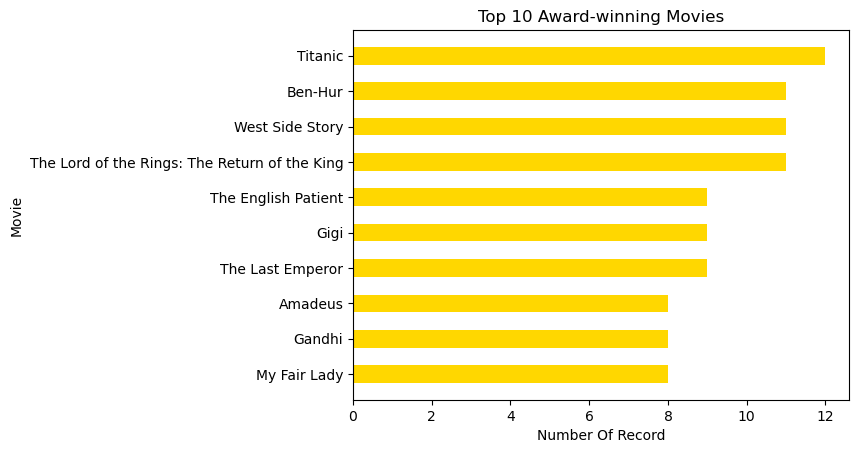

In [45]:
#Top 10 Award-winning Movies
Award_winning_movie=All_movie.sort_values(by='Awards',ascending=False).head(10)
Award_winning_movie=Award_winning_movie.sort_values(by='Awards')
movie_name=Award_winning_movie.index.tolist()

count_award=Award_winning_movie['Awards'].to_list()


vis2= plt.barh(movie_name,count_award,height=0.5, color = 'gold')
plt.xlabel('Number Of Record')
plt.ylabel('Movie')
plt.title('Top 10 Award-winning Movies')
plt.xticks(range(0,max(Award_winning_movie['Awards'])+2,2))
plt.show()


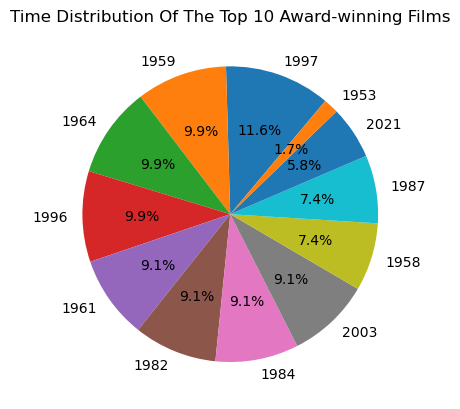

In [52]:
#Time Distribution Of The Top 10 Award-winning Films
topTenMovieInfo=oscar.loc[oscar['film'].isin(movie_name),['year_ceremony','year_film','name','film',]]


plt.pie(topTenMovieInfo.year_film.value_counts(),labels=topTenMovieInfo.year_film.value_counts().index,
        autopct='%1.1f%%',shadow=False,startangle=50)

plt.title('Time Distribution Of The Top 10 Award-winning Films')

plt.show()

In [53]:
#winner infomation
nominated_person=oscar['one_of_the_names'].value_counts()
nominated_person=pd.DataFrame(nominated_person)

nominated_person['Awards']=oscar.loc[oscar.winner==1,['one_of_the_names','winner']].groupby(by='one_of_the_names').count()

print(nominated_person.head(10))

                                             one_of_the_names  Awards
Metro-Goldwyn-Mayer                                        64    12.0
Walt Disney                                                60    23.0
John Williams                                              44     4.0
Warner Bros.                                               43     7.0
Alfred Newman                                              41     9.0
France                                                     37     9.0
Edith Head                                                 34     8.0
Art Direction:  Cedric Gibbons                             28     8.0
Italy                                                      28    10.0
Metro-Goldwyn-Mayer Studio Sound Department                27     8.0


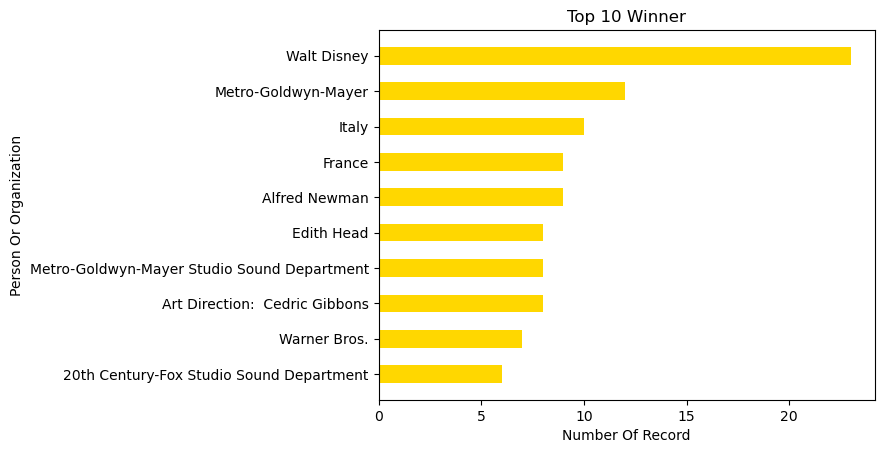

In [56]:
#Top 10 Winner
topTenAwardsP=nominated_person.sort_values(by='Awards',ascending=False).head(10)
topTenAwardsP=topTenAwardsP.sort_values(by='Awards')
#print(topTenAwardsP)
person_name=topTenAwardsP.index.tolist()

count_award=topTenAwardsP['Awards'].to_list()


vis2= plt.barh(person_name,count_award,height=0.5, color = 'gold')
plt.xlabel('Number Of Record')
plt.ylabel('Person Or Organization')
plt.title('Top 10 Winner')
#plt.xticks(range(0,int(max(topTenAwardsP['Awards']))+2))

plt.show()
